In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 47 Lecture 1 Assignment

In this assignment, we will apply k-means clustering to a dataset containing player-season statistics for NBA players from the past four years.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

This dataset contains player-season statistics for NBA players from the past four years. Each row in this dataset represents a player's per-game averages for a single season. 

This dataset contains the following variables:

- Seas: season ('2019' = 2018-2019 season, '2018' = 2017-2018 season, etc.)
- Player: player name
- Pos: position
- Age: age
- Tm: team
- G: games played
- GS: games started
- MP: minutes played
- FG: field goals
- FGA: field goals attempted
- FG%: field goal percentage
- 3P: 3 pointers
- 3PA: 3 pointers attempted
- 3P%: 3 point percentage
- 2P: 2 pointers
- 2PA: 2 pointers attempted
- 2P%: 2 point percentage
- eFG%: effective field goal percentage
- FT: free throws
- FTA: free throws attempted
- FT%: free throw percentage
- ORB: offensive rebound
- DRB: defensive rebound
- TRB: total rebounds
- AST: assists
- STL: steals
- BLK: blocks
- TOV: turnovers
- PF: personal fouls
- PTS: points

Load the dataset.

In [3]:
# answer goes her
nba = pd.read_csv('data/nba_player_seasons.csv')
nba



,Seas,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2019,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,2019,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,2019,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,2019,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,2016,Joe Young,PG,23,IND,41,0,9.4,1.5,4.1,...,0.800,0.1,1.1,1.2,1.6,0.4,0.0,0.8,0.7,3.8
2137,2016,Nick Young,SG,30,LAL,54,2,19.1,2.3,6.9,...,0.829,0.3,1.5,1.8,0.6,0.4,0.1,0.6,0.9,7.3
2138,2016,Thaddeus Young,PF,27,BRK,73,73,33.0,6.8,13.2,...,0.644,2.4,6.6,9.0,1.8,1.5,0.5,1.9,2.5,15.1
2139,2016,Cody Zeller,C,23,CHO,73,60,24.3,3.2,6.0,...,0.754,1.9,4.3,6.2,1.0,0.8,0.9,0.9,2.8,8.7


<IPython.core.display.Javascript object>

The goal is to cluster these player-seasons to identify potential player "archetypes".

Begin by removing players whose season did not meet one of the following criteria:
1. Started at least 20 games
2. Averaged at least 10 minutes per game

In [4]:
# answer goes here
nba = nba[nba['GS']>=20]
nba=nba[nba['MP']>=10]




<IPython.core.display.Javascript object>

Choose a subset of numeric columns that is interesting to you from an "archetypal" standpoint. 

We will choose the following basic statistics: **points, total rebounds, assists, steals, blocks**, and **turnovers**, but you should feel free to choose other reasonable feature sets if you like. Be careful not to include too many dimensions (curse of dimensionality).

In [5]:
nba.isna().sum()

Seas       0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%       33
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
numeric_cols = ['FG', 'FG%', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'PTS', 'MP']

scaler = StandardScaler() 
nba_final = scaler.fit_transform(nba[numeric_cols])


<IPython.core.display.Javascript object>

Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [14]:
# answer goes here
k_means= KMeans(n_clusters = 3, random_state=123)
k_means.fit(nba_final)




KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>

Run K-means clustering with K = 3 and print out the resulting centroids. When printing the centroids, transform the scaled centroids back into their corresponding unscaled values. What "archetypes" do you see?

In [30]:
# answer goes here
k_means= KMeans(n_clusters = 10, random_state=123)
k_means.fit(nba_final)
y_pred = k_means.predict(nba_final)

centroids = scaler.inverse_transform(k_means.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=numeric_cols)
centroids_df.style.background_gradient()


,FG,FG%,FT%,ORB,DRB,AST,STL,BLK,PTS,MP
0,6.478182,0.456055,0.813009,1.023636,4.429091,2.851818,0.926364,0.447273,17.607273,32.467273
1,2.451923,0.432346,0.737413,0.645192,2.440385,1.372115,0.573077,0.334615,6.575000,20.439423
2,2.905000,0.561900,0.626667,1.970000,3.980000,1.075000,0.503333,0.840000,7.055000,19.960000
3,8.184211,0.458539,0.834224,0.875000,4.493421,6.282895,1.486842,0.434211,23.678947,34.777632
4,7.859574,0.502021,0.788766,2.204255,7.412766,3.591489,1.036170,1.561702,21.202128,32.665957
5,4.900000,0.431230,0.757148,0.681967,3.604918,6.434426,1.349180,0.406557,13.329508,30.708197
6,3.700000,0.426381,0.719083,0.991667,3.732143,2.050000,1.210714,0.495238,10.059524,28.152381
7,5.432000,0.608160,0.567440,3.904000,8.568000,1.292000,0.880000,1.680000,13.564000,30.936000
8,4.266438,0.433829,0.821740,0.513014,2.730822,2.738356,0.786986,0.249315,11.765753,27.936301
9,4.765934,0.510451,0.732758,2.172527,5.298901,1.770330,0.726374,0.992308,11.917582,27.049451


<IPython.core.display.Javascript object>

Experiment with different values of K. Do any further interesting archetypes come out?

In [31]:
# answer goes here

pd.crosstab(k_means.labels_, nba['Pos'])



Pos,C,PF,PF-C,PF-SF,PG,SF,SF-SG,SG
row_0,,,,,,,,
0,5,33,0,1,9,33,0,29
1,2,28,1,1,13,31,0,28
2,51,8,0,0,0,0,0,1
3,0,2,0,0,38,13,1,22
4,31,11,0,0,2,3,0,0
5,0,4,0,0,47,2,0,8
6,0,18,0,0,5,36,0,25
7,25,0,0,0,0,0,0,0
8,1,13,0,0,45,26,1,60


<IPython.core.display.Javascript object>

In [32]:
nba["cluster_label"] = k_means.labels_

<IPython.core.display.Javascript object>

In [33]:
import seaborn as sns

<IPython.core.display.Javascript object>

In [34]:
# group 0 is mediocre defense
# group 1 star offense
# group 2 mediocre ofense
# group 3 star defense

<IPython.core.display.Javascript object>

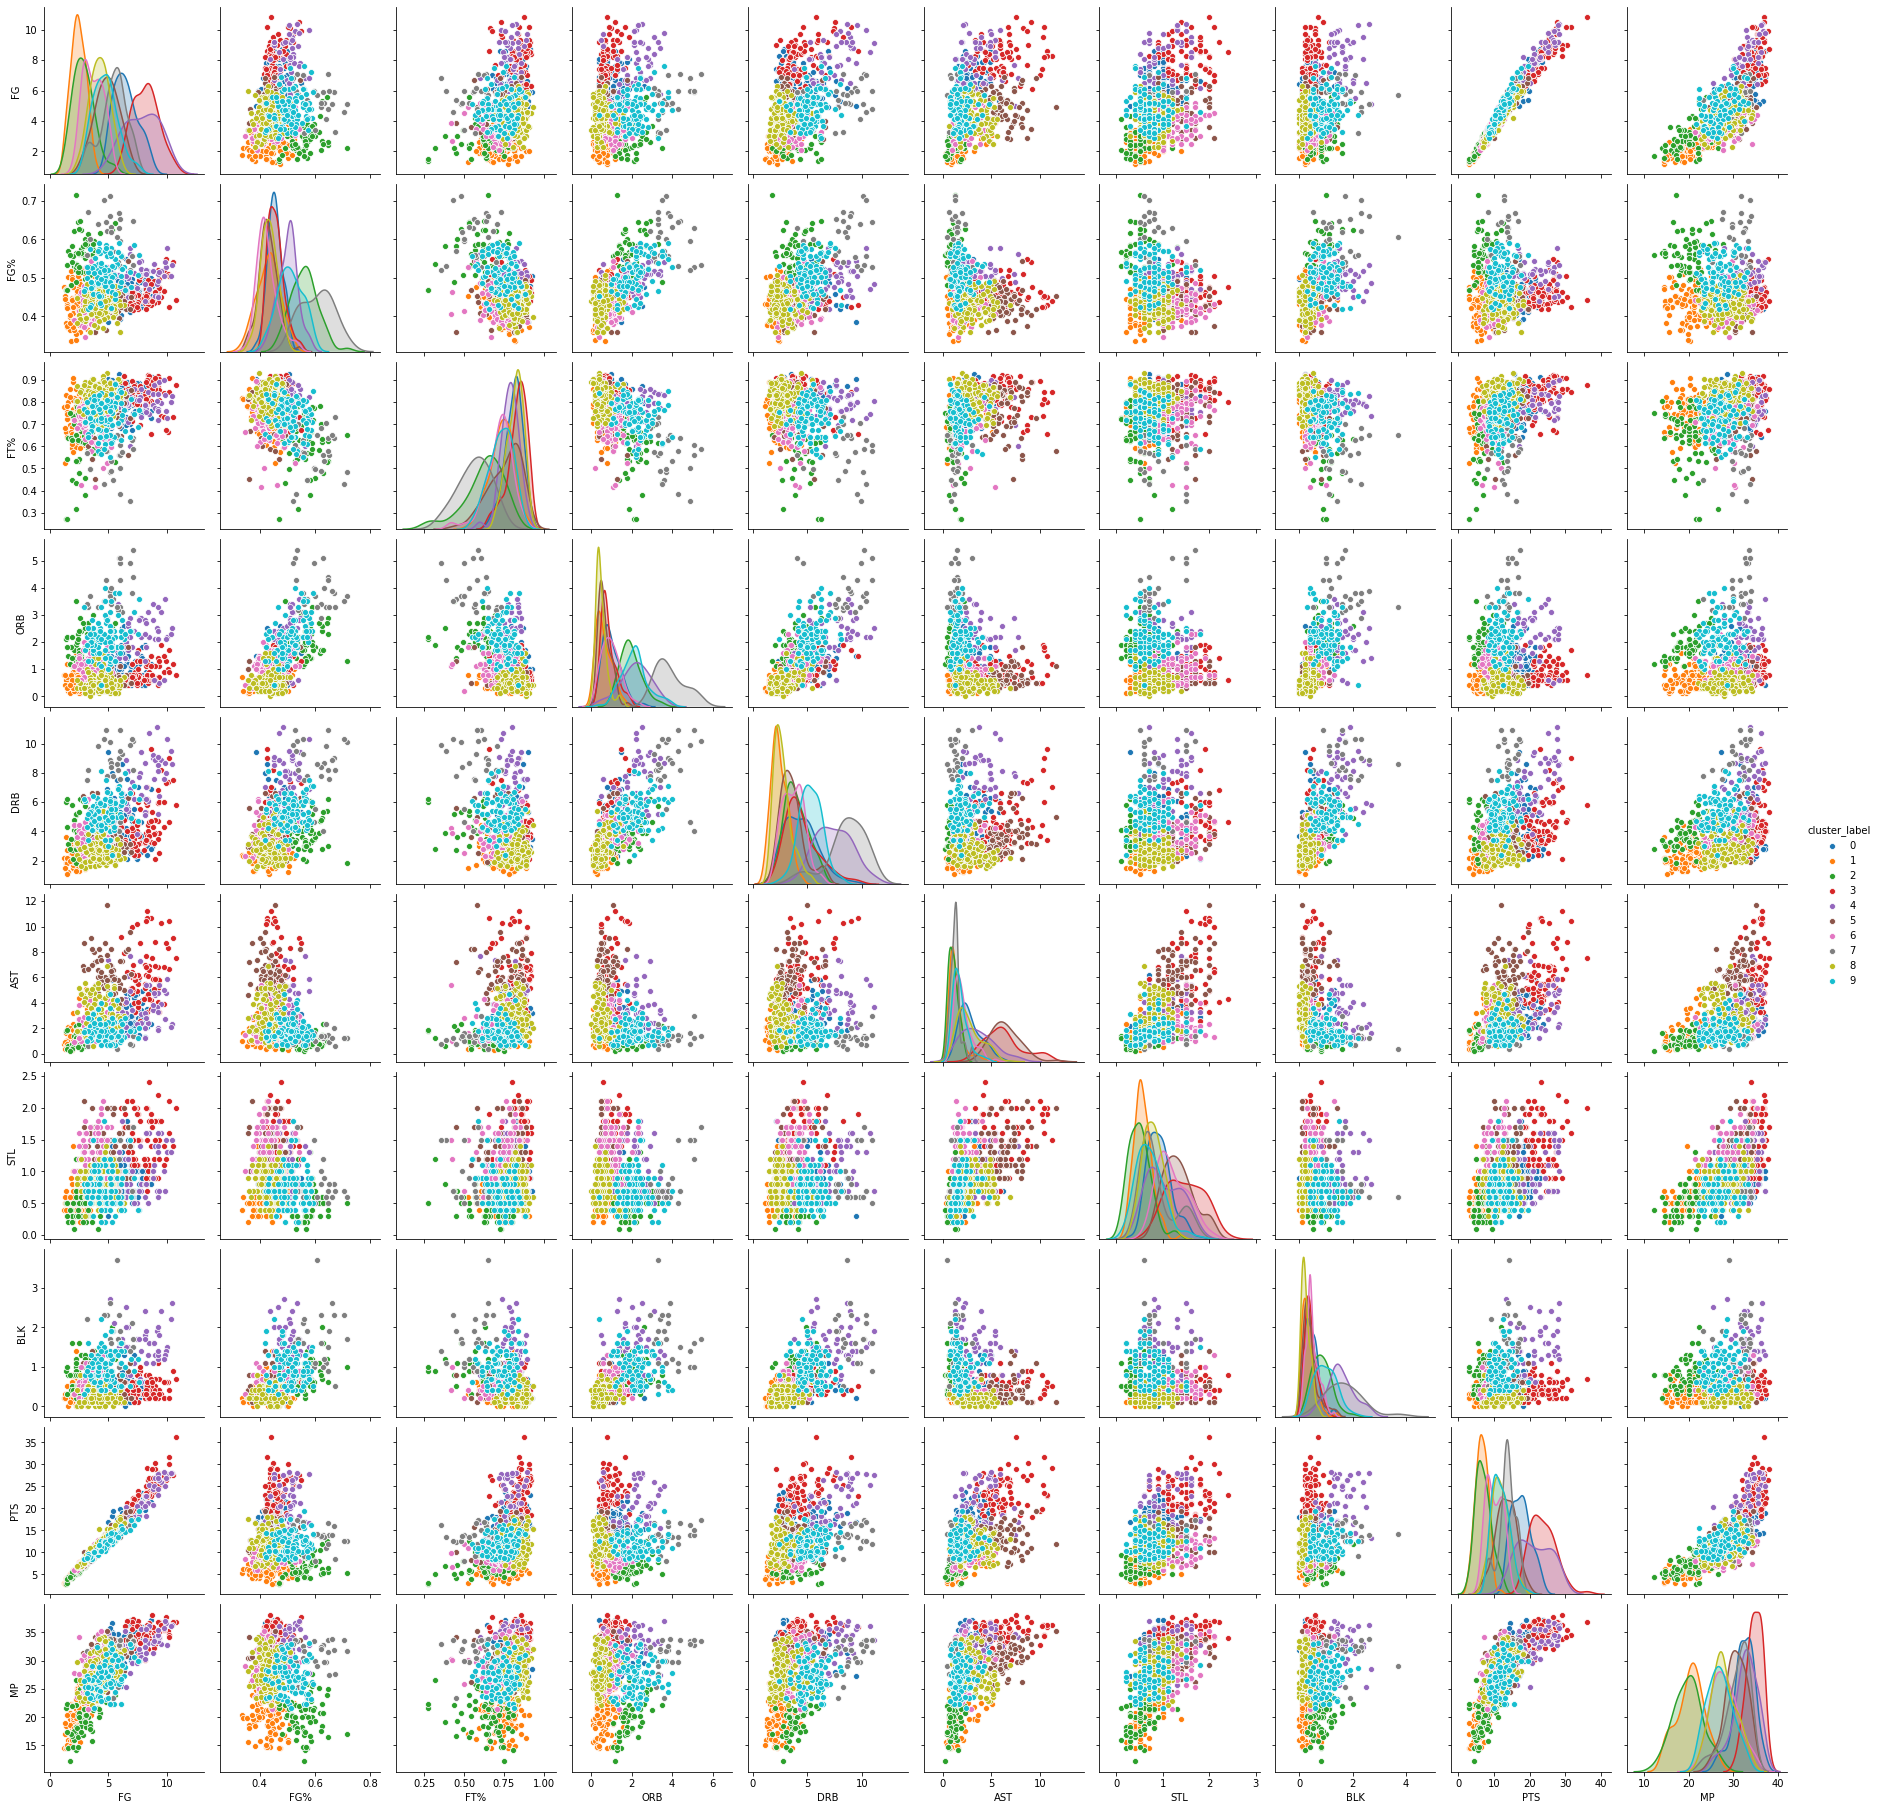

<IPython.core.display.Javascript object>

In [35]:
sns.pairplot(nba[numeric_cols + ["cluster_label"]], hue="cluster_label")